In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image
from matplotlib.ticker import FormatStrFormatter

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# import sys
# sys.path.append("ProcessModelResults/")
# from my_functions import *

In [22]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [23]:
# Catchment boundaries
lindyke_gdf = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/CatchmentLinDyke_exported.shp')
wykebeck_gdf = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/WykeBeckCatchment.shp')
# Watercourses (for whole country)
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')
# Boundary of whole city, for centering map
leeds_gdf =  gpd.read_file('../../../FloodModelling/ExtraData/LeedsBoundary/LeedsCatchments.shp')
# Profile lines
profileLines_LD = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/Features/Profile Lines.shp')
profileLines_WB = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/Features/Profile Lines.shp')

fig, ax = plt.subplots(figsize=(24, 10))
#plt.rcParams['figure.dpi']=1200 
leeds_gdf.plot(ax=ax, facecolor="none", linewidth=0.01, edgecolor ='black')
for catchment_gdf in [wykebeck_gdf, lindyke_gdf]:
    catchment_gdf.plot(ax=ax, facecolor="none", linewidth=1, edgecolor ='black')
    # get watercourses just for this catchment
    watercourses_clip = gpd.clip(watercourses, catchment_gdf)
    watercourses_clip.plot(ax=ax, linewidth=1)
    # add basemap
    ax.axis('off');

profileLines_LD.plot(ax=ax, linewidth=3, color='red') 
profileLines_WB.plot(ax=ax, linewidth=3, color='red') 
cx.add_basemap(ax, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=12)    
# fig.savefig("FigsForPaper/Catchments.png",bbox_inches='tight', dpi=1200)
fig.savefig("Figs/CatchmentLocations/Catchments_lowres.png",bbox_inches='tight')
plt.close()

In [13]:
# # Opens a image in RGB mode
# im = Image.open("FigsForPaper/Catchments.png")#.convert('L')
 
# #Image.crop(left, top, right, bottom)    
# left = 260
# top = 260
# right = 840
# bottom = 640
   
# im = im.crop((left, top, right, bottom)) 
# im.save("FigsForPaper/Catchments_test.png",bbox_inches='tight', dpi=1200)    

## Plot profiles (idealised and observed) - for Lin Dyke (but they will be v similar in both cases)

In [24]:
catchment_name = 'LinDyke'

In [25]:
feh_profile = pd.read_csv("../CreateSyntheticRainfallEvents/FEHProfiles/LinDyke/6hr_100yrRP/PreLossRemoval/6hr_100yrRP_6.01h_1mintimestep.csv".format(catchment_name))

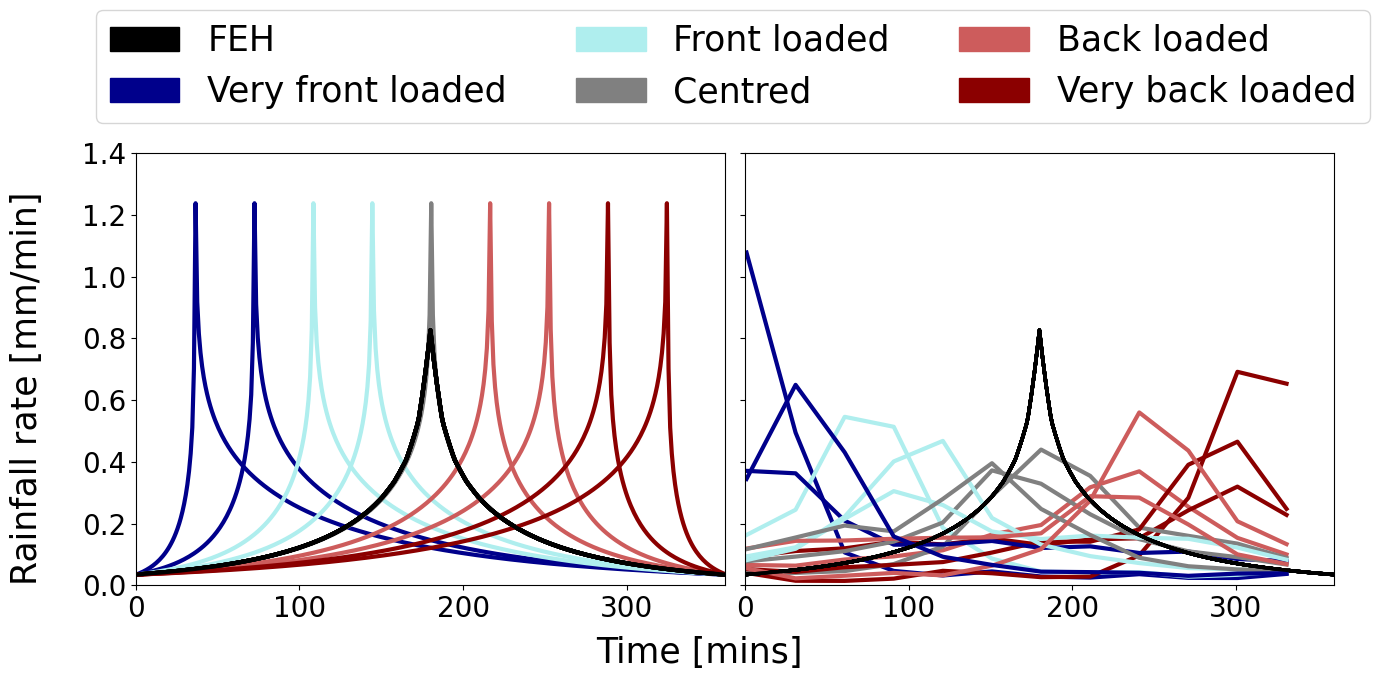

In [26]:
# Set up colours
colors_obs = ["darkblue","indianred","paleturquoise","darkred","darkred","grey","darkred","darkblue","grey","paleturquoise","paleturquoise","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['paleturquoise']*2 + ['grey']+ ['indianred']*2+['darkred']*2
colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(13,5), sharey=True)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    
for cluster_number in range(1,16):
    # Read in pre and post loss removal data
    observed_profile = pd.read_csv('../CreateSyntheticRainfallEvents/ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
    test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
    axs[1].plot(test['Minute'],test['Rainfall'], color=colors_obs[cluster_number-1], linewidth = 3)   
    #axs[1].set_ylim(-0.05,1.35)    
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
    # loop through tickers and axes
    axs[1].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid')

fig.text(0.5, -0.05, 'Time [mins]', ha='center', fontsize = 25)
fig.text(-0.03, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 25)

fig.tight_layout() 

##############
# Create legend
##############
colors_leg = ['black', 'darkblue', 'paleturquoise','grey', 'indianred', 'darkred']
texts = ['FEH', 'Very front loaded','Front loaded','Centred', 'Back loaded', 'Very back loaded'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(1.24, 0.5), loc='center', ncol=1, prop={'size': 15});
# plt.legend(handles=patches, bbox_to_anchor=(0.78, 0.79), loc='center', ncol=1, prop={'size': 13.5});
plt.legend(handles=patches, bbox_to_anchor=(-0.02, 1.20), loc='center', ncol=3, prop={'size': 25});

custom_xlim = (0, 360)
custom_ylim = (-0, 1.4)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

##############
# Save figure
##############
fig.savefig("../CreateSyntheticRainfallEvents/Figs/Idealised_Observed_Profiles_{}.png".format(catchment_name),bbox_inches='tight')   

## Plot flooded extent

In [27]:
cluster_results_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_ip_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/allclusters_summary.csv",
                                  keep_default_na=False)

In [28]:
cluster_results_ip_ls = [cluster_results_ip_ld,cluster_results_ip_wb]
cluster_results_op_ls = [cluster_results_op_ld,cluster_results_op_wb]
catchment_name_ls = ['LinDyke','WykeBeck', 'LinDyke','WykeBeck']
cluster_results_ls_ls = [cluster_results_ip_ls, cluster_results_op_ls]

../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot.PNG


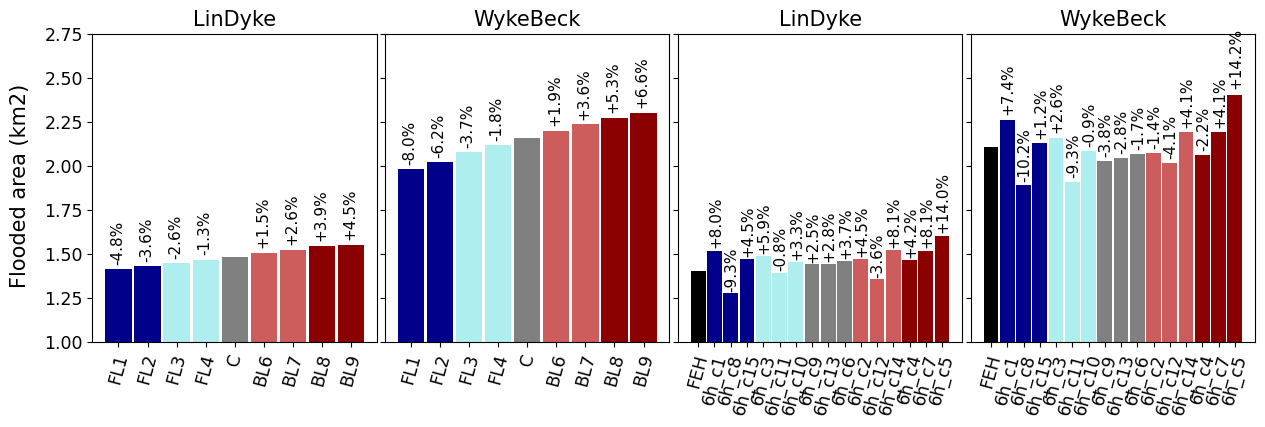

In [29]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, '', 'Idealised','IP',ylim = 2.75, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.3,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.03, 1.02], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.02,1.02], set_title=True)

In [30]:
cluster_results_op_ld

,Cluster_num,MaxRainfallIntensity,MaxRainfallIntensityMinute,FloodedArea,%Diff_FloodedArea_fromSP,%Diff_FloodedArea_fromSP_formatted,Abs%Diff_FloodedArea_fromSP,UrbanFloodedArea,%Diff_UrbanFloodedArea_fromSP,%Diff_UrbanFloodedArea_fromSP_formatted,...,Significant hazard_propcells,Extreme hazard_propcells,Low hazard_countcells_urban,Moderate hazard_countcells_urban,Significant hazard_countcells_urban,Extreme hazard_countcells_urban,Low hazard_propcells_urban,Moderate hazard_propcells_urban,Significant hazard_propcells_urban,Extreme hazard_propcells_urban
0,FEH,0.201255,180,1.406985,0.000000,,0.0,0.278229,0.000000,,...,28.6,2.9,194983,59285,165630,25589,43.8,13.3,37.2,5.7
1,6h_c1,0.268025,29,1.520183,8.045430,+8.0%,8.0,0.348331,25.195792,+25.2%,...,27.8,4.2,252250,69637,191670,31237,46.3,12.8,35.2,5.7
2,6h_c8,0.081566,59,1.276786,9.253759,-9.3%,9.3,0.221705,20.315639,-20.3%,...,31.7,3.0,120936,41623,122545,13260,40.5,14.0,41.1,4.4
3,6h_c15,0.157838,59,1.470606,4.521797,+4.5%,4.5,0.327194,17.598812,+17.6%,...,28.4,4.1,205575,60454,166307,25607,44.9,13.2,36.3,5.6
4,6h_c3,0.142229,119,1.490240,5.917263,+5.9%,5.9,0.334691,20.293355,+20.3%,...,27.8,3.9,211475,59519,167148,27754,45.4,12.8,35.9,6.0
5,6h_c11,0.068304,119,1.395863,0.790485,-0.8%,0.8,0.294522,5.855968,+5.9%,...,29.8,4.2,139962,44380,131414,17950,41.9,13.3,39.4,5.4
6,6h_c10,0.124298,149,1.453376,3.297192,+3.3%,3.3,0.321559,15.573502,+15.6%,...,28.2,3.9,186459,54370,153865,23795,44.6,13.0,36.8,5.7
7,6h_c9,0.090729,179,1.441676,2.465627,+2.5%,2.5,0.314500,13.036384,+13.0%,...,28.0,4.0,166718,49425,143855,22398,43.6,12.9,37.6,5.9
8,6h_c13,0.105308,179,1.446025,2.774728,+2.8%,2.8,0.317945,14.274572,+14.3%,...,27.9,4.0,172284,50802,146173,23805,43.8,12.9,37.2,6.1
9,6h_c6,0.108702,209,1.458626,3.670331,+3.7%,3.7,0.321978,15.724098,+15.7%,...,28.3,4.0,181141,53276,154029,25006,43.8,12.9,37.3,6.0


../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot.PNG


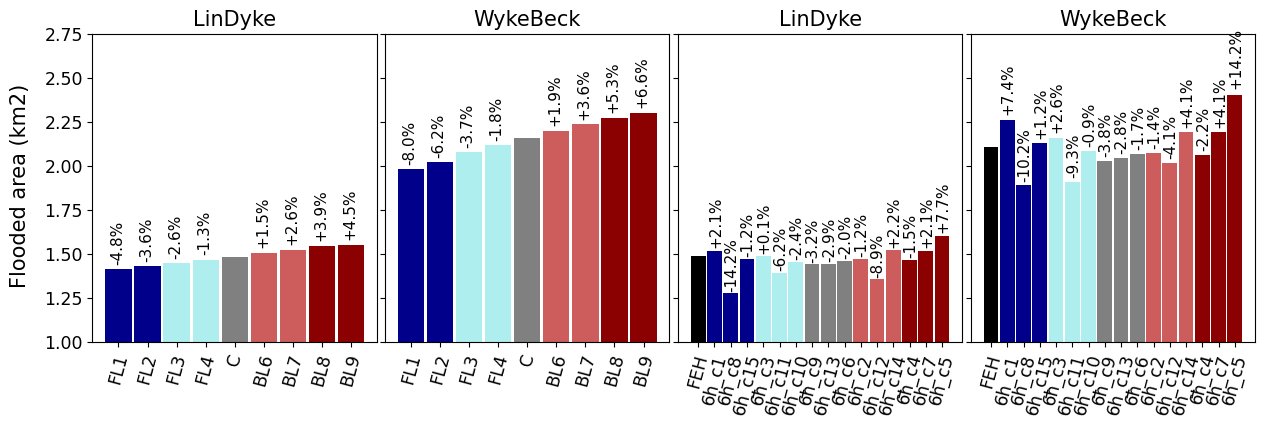

In [7]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, '', 'Idealised','IP',ylim = 2.75, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.3,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.03, 1.02], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.02,1.02], set_title=True)

In [8]:
cluster_results_op_ld

,Cluster_num,MaxRainfallIntensity,MaxRainfallIntensityMinute,FloodedArea,%Diff_FloodedArea_fromSP,%Diff_FloodedArea_fromSP_formatted,Abs%Diff_FloodedArea_fromSP,UrbanFloodedArea,%Diff_UrbanFloodedArea_fromSP,%Diff_UrbanFloodedArea_fromSP_formatted,...,Significant hazard_propcells,Extreme hazard_propcells,Low hazard_countcells_urban,Moderate hazard_countcells_urban,Significant hazard_countcells_urban,Extreme hazard_countcells_urban,Low hazard_propcells_urban,Moderate hazard_propcells_urban,Significant hazard_propcells_urban,Extreme hazard_propcells_urban
0,FEH,0.201255,180,1.488722,0.000000,,0.0,0.334074,0.000000,,...,28.6,4.1,208536,62121,171776,28152,44.3,13.2,36.5,6.0
1,6h_c1,0.268025,29,1.520183,2.113289,+2.1%,2.1,0.348331,4.267617,+4.3%,...,27.8,4.2,252250,69637,191670,31237,46.3,12.8,35.2,5.7
2,6h_c8,0.081566,59,1.276786,14.236103,-14.2%,14.2,0.221705,33.635961,-33.6%,...,31.7,3.0,120936,41623,122545,13260,40.5,14.0,41.1,4.4
3,6h_c15,0.157838,59,1.470606,1.216883,-1.2%,1.2,0.327194,2.059424,-2.1%,...,28.4,4.1,205575,60454,166307,25607,44.9,13.2,36.3,5.6
4,6h_c3,0.142229,119,1.490240,0.101967,+0.1%,0.1,0.334691,0.184690,+0.2%,...,27.8,3.9,211475,59519,167148,27754,45.4,12.8,35.9,6.0
5,6h_c11,0.068304,119,1.395863,6.237498,-6.2%,6.2,0.294522,11.839293,-11.8%,...,29.8,4.2,139962,44380,131414,17950,41.9,13.3,39.4,5.4
6,6h_c10,0.124298,149,1.453376,2.374251,-2.4%,2.4,0.321559,3.746176,-3.7%,...,28.2,3.9,186459,54370,153865,23795,44.6,13.0,36.8,5.7
7,6h_c9,0.090729,179,1.441676,3.160160,-3.2%,3.2,0.314500,5.859181,-5.9%,...,28.0,4.0,166718,49425,143855,22398,43.6,12.9,37.6,5.9
8,6h_c13,0.105308,179,1.446025,2.868030,-2.9%,2.9,0.317945,4.827972,-4.8%,...,27.9,4.0,172284,50802,146173,23805,43.8,12.9,37.2,6.1
9,6h_c6,0.108702,209,1.458626,2.021600,-2.0%,2.0,0.321978,3.620755,-3.6%,...,28.3,4.0,181141,53276,154029,25006,43.8,12.9,37.3,6.0


../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot_Urban.PNG


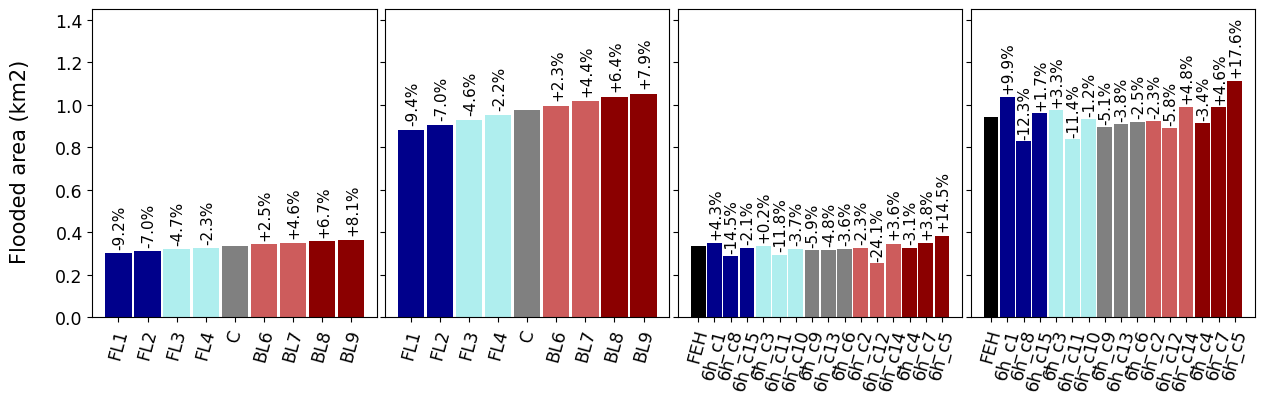

In [13]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Urban', 'Idealised','IP',ylim = 1.45, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.2,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.1, 1.1], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.04,1.03])

../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot_Notwater.PNG


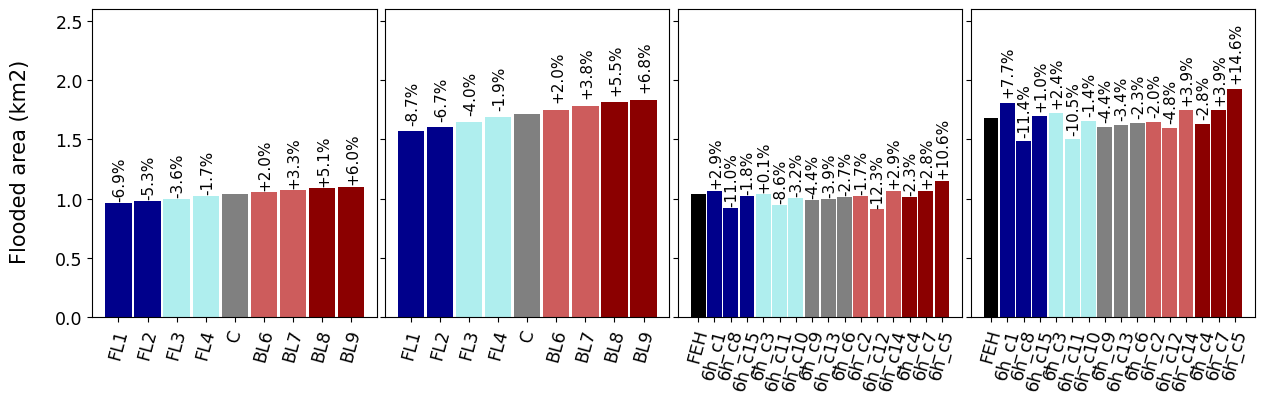

In [14]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Notwater', 'Idealised','IP',ylim = 2.6, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.2,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.04, 1.04], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.05,1.04])

## Plot Flood Severity

In [15]:
individual_cell_values_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_ip_wb=pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/individual_cell_values.csv")
individual_cell_values_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/individual_cell_values.csv")
individual_cell_values_sps_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/SinglePeak_ScaledProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_sps_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/SinglePeak_ScaledProfiles/WykeBeck/individual_cell_values.csv")

In [16]:
# individual_cell_values_ip = [individual_cell_values_ip_ld,individual_cell_values_ip_wb]
# individual_cell_values_op = [individual_cell_values_op_ld,individual_cell_values_op_wb]
# individual_cell_values_sps = [individual_cell_values_sps_ld,individual_cell_values_sps_wb]

individual_cell_values_ip_dict = {'LinDyke': individual_cell_values_ip_ld,
                             'WykeBeck': individual_cell_values_ip_wb}
individual_cell_values_op_dict = {'LinDyke': individual_cell_values_op_ld,
                             'WykeBeck': individual_cell_values_op_wb}

### Plot histograms

In [17]:
def plot_histogram_weighted (individual_cell_values_dict, profiles_name, profiles_name_short, smallest_method,
                    largest_method, filter_out_water, title = True):
    
    catchments = ['LinDyke', 'WykeBeck', 'LinDyke', 'WykeBeck']
    variables = ['Depth', 'Depth', 'Velocity', 'Velocity']
    
    # Set up figure
    fig, axs = plt.subplots(ncols= 2, nrows=2, sharey=False,figsize =(11,5), gridspec_kw={'hspace':0.5, 'wspace': 0.3})
    dfs=[]
    
    for ax_number, ax in enumerate(axs.flatten()):
        variable_name = variables[ax_number]
        catchment_name = catchments[ax_number]
        
        # Get data
        individual_cell_values =  individual_cell_values_dict[catchment_name]

        # Filter out cells which are water
        if filter_out_water == True:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class']==10]
        
        # Define bins
        if variable_name == 'Depth':
            bins = [0.1,0.3,0.6,1.2, 3]
            b = [f'{i}-{j}m' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
            b = [f'{i}-{j}m' for i, j in zip(bins[:], bins[1:])] 
            b = b + ['>3m']
            label = 'Depth (m)'
            
        elif variable_name =='Velocity':
            bins =[0, 0.25, 0.5, 1, 2, 3]
            b = [f'{i}-{j}m/s' for i, j in zip(np.round(bins,2)[:], np.round(bins,2)[1:])] 
            b = b + ['>3m/s']
            label = 'Velocity (m/s)'

        # Set weights differently to account for different cell sizes 
        if catchment_name =='WykeBeck':
            weight = 4 * 0.000001 
        elif catchment_name == 'LinDyke':
            weight = 0.000001 

        # Get the 2 most extreme scenario results separately
        extremes = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method, largest_method])].copy()
        # Get so the most/least extreme appear in plots with the colours in same order
        if profiles_name =='SinglePeak_Scaled':
            extremes.sort_values(by=['short_id'],ascending =True, inplace=True)
        else:
            extremes.sort_values(by=['short_id'],ascending=True, inplace=True)

        # Plot
        ls_values = sns.histplot(ax=ax, data=extremes, x=variable_name, hue='short_id',stat='count',
                                 element = 'step', weights=weight,linewidth=2, fill =False,log_scale=False,
                                 bins=bins, palette = ['darkred','darkblue']).get_lines()
        ax.set_ylabel('Area (km2)')
        ax.set_xticks(bins)
        ax.tick_params(axis='x', rotation=55)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.set_xlabel (label)
        
        # Set title
        if variable_name == 'Depth':
            ax.set_title(catchment_name, fontsize=15)

        #### Get change percentages
        most_extreme_ls = []
        least_extreme_ls = []
        diff_ls=[]
        for num in range(0,len(ls_values[1].get_data()[1][:-1])):
            least_extreme = ls_values[0].get_data()[1][:-1][num]
            least_extreme_ls.append(round(least_extreme,2))
            most_extreme = ls_values[1].get_data()[1][:-1][num]
            most_extreme_ls.append(round(most_extreme,2))
            diff=most_extreme-least_extreme
            diff_ls.append(round(diff,3))

        # Add ones not in the histogram    
        largest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([largest_method])].copy()
        smallest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method])].copy()

        if variable_name == 'Depth':
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Depth']>=bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Depth']>=bins[-1]])
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        else:
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Velocity']>=bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Velocity']>=bins[-1]])      
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        
        # Difference
        diff_abovehist = most_extreme_abovehist - least_extreme_abovehist
        diff_ls.append(round((diff_abovehist/1000000),4))

        # Add column in dataframe
        df = pd.DataFrame({'label':b, 'LeastExtreme': least_extreme_ls, 'MostExtreme':most_extreme_ls, 'Difference': diff_ls})
        dfs.append(df)
    
    if filter_out_water == False:
        fig.savefig("../ProcessModelResults/Outputs/Figs/{}Profiles/{}_Histograms.PNG".format(profiles_name, profiles_name_short), bbox_inches='tight')
    else:
        fig.savefig("../ProcessModelResults/Outputs/Figs/{}Profiles/{}_Histograms_withoutwater.PNG".format(profiles_name, profiles_name_short), bbox_inches='tight')
    
    return dfs


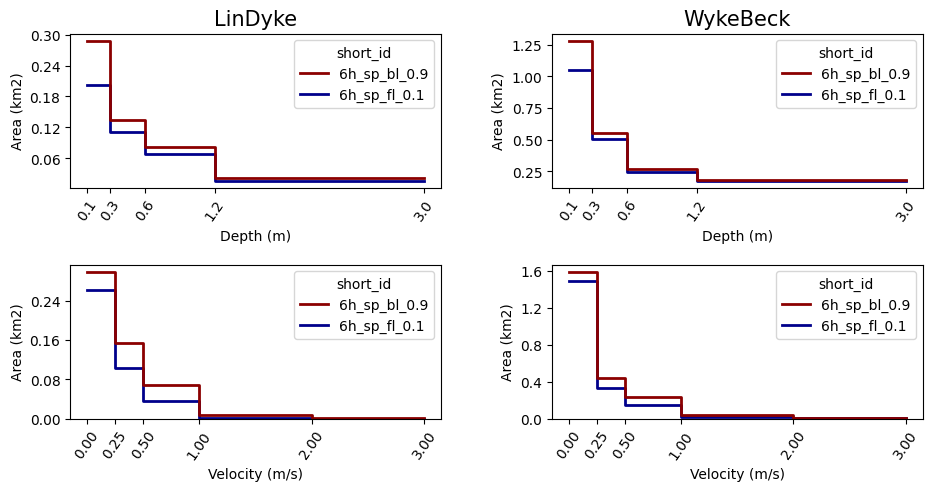

In [18]:
df_idealised = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','6h_sp_fl_0.1', '6h_sp_bl_0.9', 
                                       filter_out_water = False, title= True)

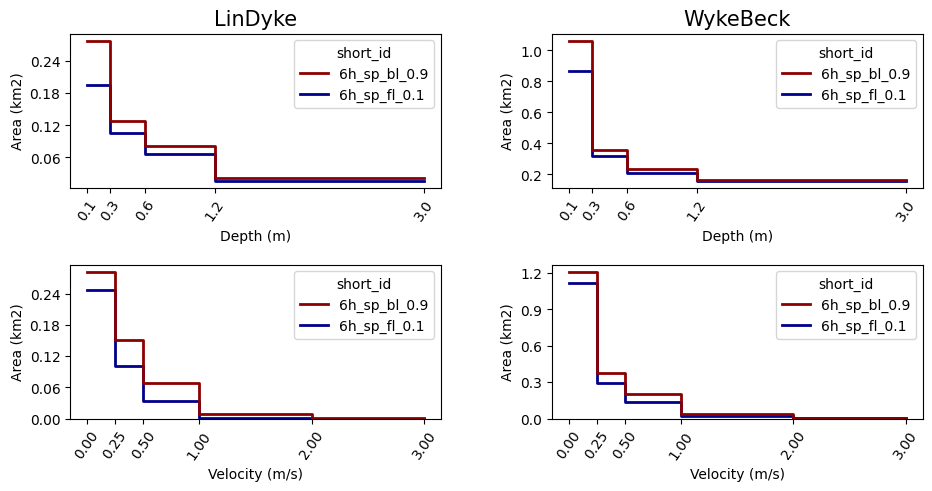

In [19]:
df_idealised_nowater = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','6h_sp_fl_0.1', '6h_sp_bl_0.9', 
                                       filter_out_water = True,title= True)

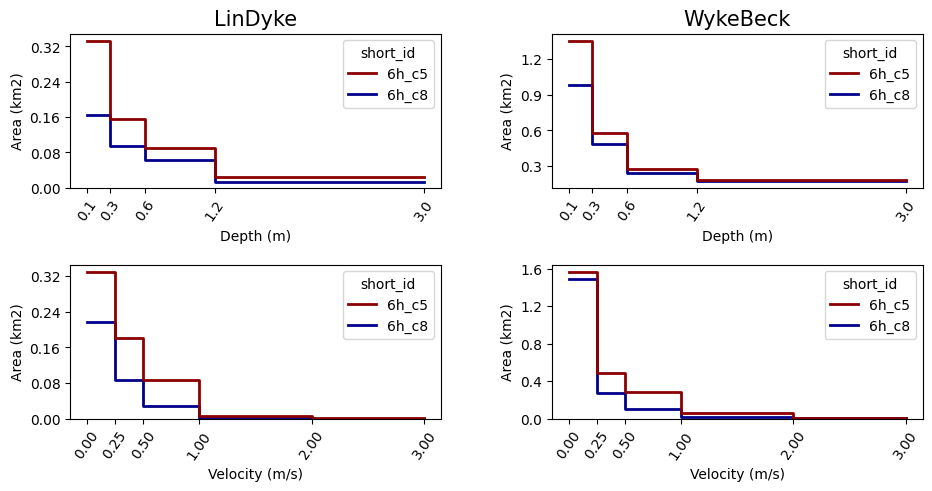

In [20]:
df_observed = plot_histogram_weighted(individual_cell_values_op_dict,'Observed','OP','6h_c8', '6h_c5' , 
                                      filter_out_water = False,  title= True)

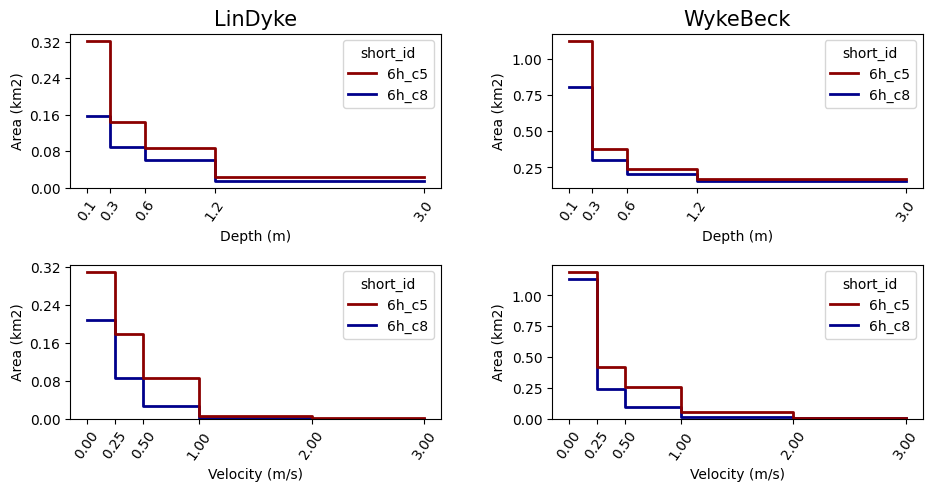

In [21]:
df_observed_notwater = plot_histogram_weighted(individual_cell_values_op_dict,'Observed','OP','6h_c8', '6h_c5' , 
                                      filter_out_water = True, title= True)

In [22]:
def find_numbers_in_bins (df_list_idealised, df_list_observed, FloodedAreaColumn, ld_col_num, wb_col_num):
    df = pd.DataFrame({"label":df_list_idealised[ld_col_num]['label'],
                      'LD_Idealised':df_list_idealised[ld_col_num]['Difference'],
                      'WB_Idealised':df_list_idealised[wb_col_num]['Difference'],
                      'LD_Observed':df_list_observed[ld_col_num]['Difference'],
                      'WB_Observed':df_list_observed[wb_col_num]['Difference']})
    ld_ip_diff = round(cluster_results_ip_ld[FloodedAreaColumn][8] - cluster_results_ip_ld[FloodedAreaColumn][0],3)
    wb_ip_diff = round(cluster_results_ip_wb[FloodedAreaColumn][8] - cluster_results_ip_wb[FloodedAreaColumn][0],3)
    ld_op_diff = round(cluster_results_op_ld[FloodedAreaColumn][15] - cluster_results_op_ld[FloodedAreaColumn][2],3)
    wb_op_diff = round(cluster_results_op_wb[FloodedAreaColumn][15] - cluster_results_op_wb[FloodedAreaColumn][2],3)
    list_row = ["TotalDiffBetweenExtremes",ld_ip_diff, wb_ip_diff, ld_op_diff, wb_op_diff]
    df.loc[len(df)] = list_row
    df['LD_Idealised_%'] = round(df['LD_Idealised']/ld_ip_diff,2)*100
    df['WB_Idealised_%'] = round(df['WB_Idealised']/wb_ip_diff,2)*100
    df['LD_Observed_%'] = round(df['LD_Observed']/ld_op_diff,2)*100
    df['WB_Observed_%'] = round(df['WB_Observed']/wb_op_diff,2)*100
    df.loc[len(df)] = df.iloc[0:4,].sum(axis=0)
    return (df)

In [23]:
df_depth =  find_numbers_in_bins(df_idealised, df_observed, 'FloodedArea', 0, 1)
# df_depth

In [24]:
df_depth_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_notwater, 'NotwaterFloodedArea', 0, 1)
# df_depth_nowater

In [25]:
df_velocity =  find_numbers_in_bins(df_idealised, df_observed, 'FloodedArea', 2, 3)
# df_velocity

In [26]:
df_velocity_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_notwater, 'NotwaterFloodedArea', 2, 3)
df_velocity_nowater[['label', 'WB_Idealised', 'WB_Idealised_%']]

,label,WB_Idealised,WB_Idealised_%
0,0.0-0.25m/s,0.0920,34.0
1,0.25-0.5m/s,0.0840,31.0
2,0.5-1.0m/s,0.0700,26.0
3,1.0-2.0m/s,0.0180,7.0
4,2.0-3.0m/s,0.0020,1.0
5,>3m/s,0.0004,0.0
6,TotalDiffBetweenExtremes,0.2670,100.0
7,0.0-0.25m/s0.25-0.5m/s0.5-1.0m/s1.0-2.0m/s,0.2640,98.0


### Hazard

In [27]:
def hazard_plot(individual_cell_values_dict,  profiles_name, profiles_name_short, smallest_method_str,
                    largest_method_str,filter_out_water, title = True):
    
    fig, axs = plt.subplots(ncols= 2, nrows=1, sharey=False,figsize = (12,3), gridspec_kw={'hspace':1, 'wspace': 0.2})
    catchments = ['LinDyke', 'WykeBeck']

    ##############################
    # Plot number of flooded cells
    ##############################
    for ax_number, ax in enumerate(axs.flatten()):
        catchment_name = catchments[ax_number]
        if catchment_name == "LinDyke":
            cell_size_in_m2 = 1
        elif catchment_name == "WykeBeck":
            cell_size_in_m2 = 4
        
        # Get data
        individual_cell_values =  individual_cell_values_dict[catchment_name]
        # Filter out cells which are water
        if filter_out_water == True:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class']==10]
        
        # Get biggest/smallest method data
        largest_method = individual_cell_values[individual_cell_values['short_id'] == largest_method_str]
        smallest_method = individual_cell_values[individual_cell_values['short_id'] == smallest_method_str]
        
        largest_method_val = np.unique(largest_method['Hazard'],return_counts=True)[1]
        smallest_method_val = np.unique(smallest_method['Hazard'],return_counts=True)[1]
        
        largest_method_val =  largest_method_val * (cell_size_in_m2/1000000)
        smallest_method_val =  smallest_method_val* (cell_size_in_m2/1000000)
        
        # make dataframe
        hazard_cats =pd.DataFrame({'Hazard_cat':['Low', 'Moderate', 'Significant', 'Extreme'],
                                  smallest_method_str: smallest_method_val,
                                   largest_method_str:largest_method_val})
        
        hazard_cats.set_index('Hazard_cat').plot.bar(ax=axs[ax_number], rot = 0,  width=0.8, color=['darkblue', 'darkred'])
        
        if title == True:
            axs[ax_number].set_title(catchment_name_ls[ax_number],fontsize=15)      
        
        ax.set_ylabel("Area (km2)")
        ax.set_xlabel('')
        
    if filter_out_water == False:
        fig.savefig("../ProcessModelResults/Outputs/Figs/{}Profiles/{}_HazardCats.PNG".format(profiles_name,profiles_name_short), 
               bbox_inches='tight')
    elif filter_out_water == True:
        fig.savefig("../ProcessModelResults/Outputs/Figs/{}Profiles/{}_HazardCats_withoutwater.PNG".format(profiles_name,profiles_name_short), 
               bbox_inches='tight')

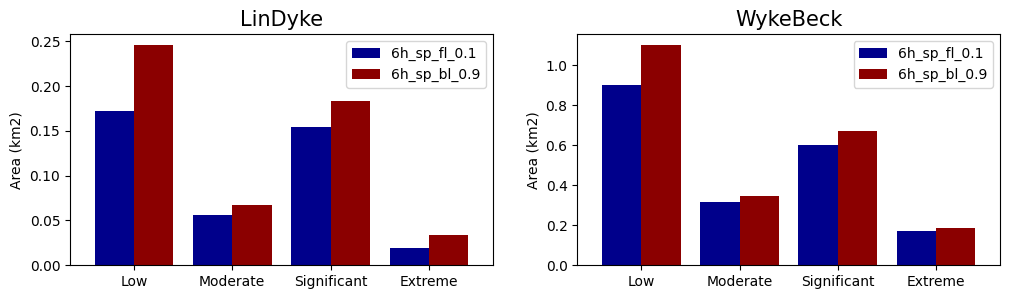

In [28]:
hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9', filter_out_water= False)

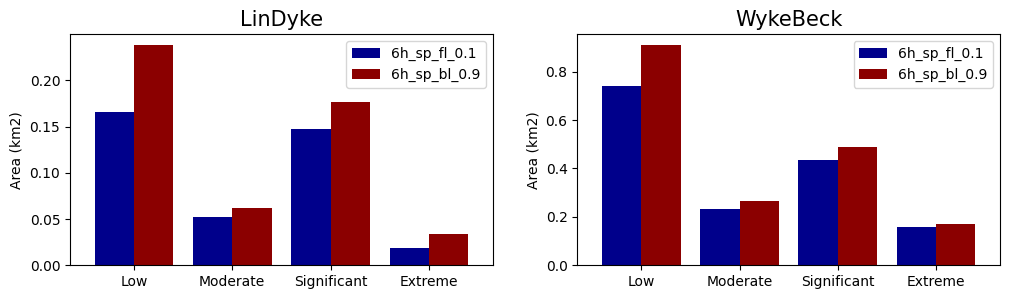

In [35]:
hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9', filter_out_water= True)

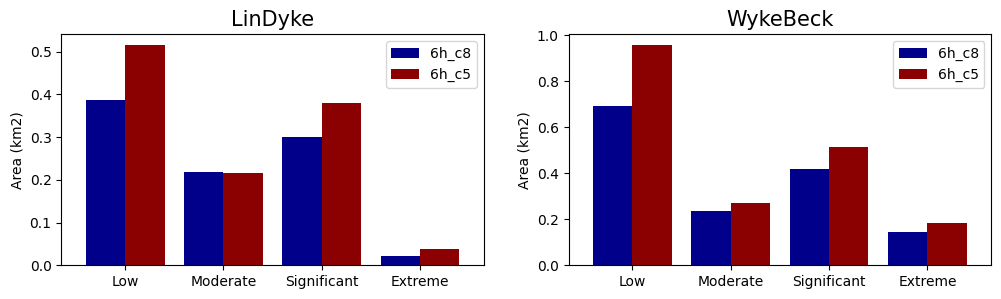

In [31]:
hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','6h_c8', '6h_c5', filter_out_water= True)

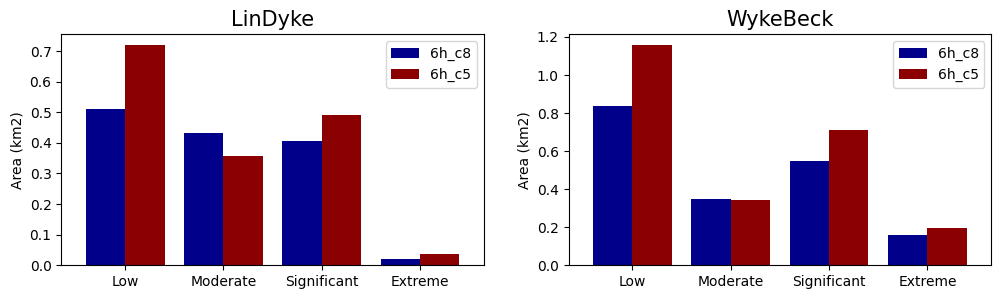

In [32]:
hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','6h_c8', '6h_c5', filter_out_water= False)

## Flow timeseries

In [33]:
# profile_line_names_ld = ['KippaxBeck', 'SheffieldBeck', 'LinDyke']
# profile_line_names_wb = ['WykeBeck','WykeBeck_YorkRoad','WykeBeck_PontefractLane','OtherStream_AheadOfConfluence',
#                      'CatchmentBottom']
# profile_line_names_wb_forplot = ['WykeBeck','WB (YorkRd)','WB (PontefractLane)','OtherStream',
#                      'CatchmentBottom']

# profile_line_names={'LinDyke':profile_line_names_ld, 'WykeBeck': profile_line_names_wb}

In [34]:
# catchment_name = 'LinDyke'
# catchment_name_short = "LD"
# sharey= False

# if sharey == True:
#     sharey_identifier = "_sharey"
# else:
#     sharey_identifier = ''

# # Make the plot
# fig, axs = plt.subplots(nrows=2,ncols=len(profile_line_names[catchment_name]), figsize = (14,6), sharex=True, sharey=sharey)

# # Additional loop:
# for methods_num, methods_key in enumerate(["Idealised", 'Observed']):
#     # Get
#     colors = colors_ls[methods_key]
#     model_directory = '../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, methods_key)
    
#     # Create the column names used in the Hec-Ras flow timeseries output
#     methods = methods_dict[methods_key]
#     methods=methods[1:]
#     column_names = ['Time (03/08/2022)']
#     for method in methods:
#         column_names.append(method + ' [Post Processed] (CMS)')
    
#     # Loop through each of the profile line location and create a subplot with the flow timeseries lines for each rainfall profile
#     for axs_numb, profile_line in enumerate(profile_line_names[catchment_name]):
#         # Read in data and reorder columns
#         flow_timeseries = pd.read_csv(model_directory + "FlowLines/{}.csv".format(profile_line))[column_names]
#         # Trim off end
#         flow_timeseries = flow_timeseries[:700]
        
#         # Get FEH data
#         feh_flow_timeseries = pd.read_csv('../../FloodModelling/{}Models/Model_FEHProfiles/FlowLines/{}.csv'.format(catchment_name, profile_line))
#         feh_flow_timeseries = feh_flow_timeseries[:700]
        
#         # Plot each line
#         for number, column in enumerate(flow_timeseries.columns[1:]):
#             axs[methods_num,axs_numb].plot(flow_timeseries[column], color = colors[number])
#             axs[methods_num,axs_numb].plot(feh_flow_timeseries['6h_feh_singlepeak [Post Processed] (CMS)'], color = 'black',
#                                           linestyle='dashed')
            
#             # Add flow label to just the left hand plot
#             if axs_numb ==0:
#                 axs[methods_num, axs_numb].set_ylabel('Flow (cumecs)')
#             #  Add minute label if bottom row
#             if methods_num ==1:
#                 axs[methods_num, axs_numb].set_xlabel('Minute')                    
#             # Add the catchment names (using modified ones for WB)    
#             if catchment_name == 'LinDyke':    
#                 axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names[catchment_name][axs_numb],
#                                                horizontalalignment='left',verticalalignment='top',
#                                                 transform = axs[methods_num,axs_numb].transAxes)
#                  # Add row title 
#                 if axs_numb ==1:
#                     axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)   
#             else:
#                 axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names_wb_forplot[axs_numb],
#                                                horizontalalignment='left',verticalalignment='top',
#                                                 transform = axs[methods_num,axs_numb].transAxes)
#                  # Add row title 
#                 if axs_numb ==2:
#                     axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)                   
         
            
# # Legend
# colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
# texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
# patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
# plt.legend(handles=patches, bbox_to_anchor=(1.25, 1), loc='center', ncol=1, prop={'size': 9} )

# # fig.suptitle(catchment_name, fontsize=20)
# figname = "../ProcessModelResults/Outputs/Figs/BothProfiles/{}/{}_FlowTimeSeries{}.PNG".format(catchment_name, 
#                                                                                           catchment_name_short, sharey_identifier)

# plt.subplots_adjust(wspace=0.25)
# fig.savefig(figname,bbox_inches='tight')

## Plot flooded area over time